1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [289]:
# Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, 
# with a given mean a standard deviation
import numpy as np
import seaborn as sns
N=500
mean=0
stddev=1
x = np.random.normal(mean, stddev, N)

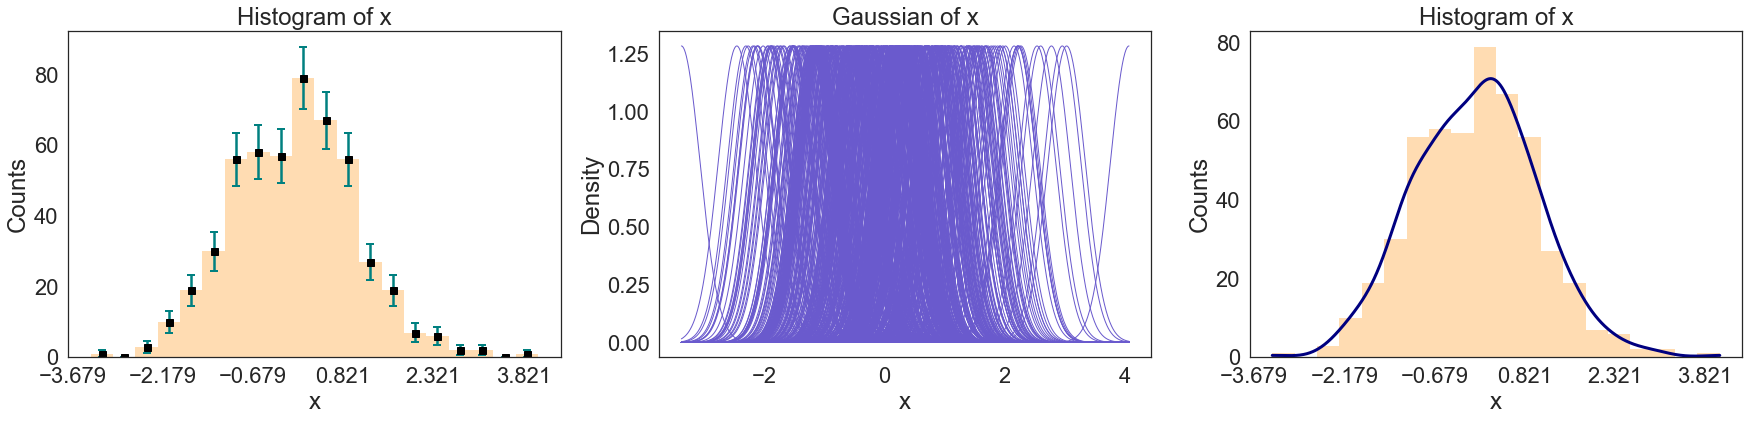

In [318]:
# Fill an histogram in pyplot taking properly care about the aesthetic
#    * use a meaningful number of bins
#    * set a proper y axis label
#    * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
#    * display the histograms as data points with errors (the error being the poisson uncertainty)

import matplotlib.pyplot as plt
fig,ax=plt.subplots(ncols = 3, figsize=(30,6))
sns.set_theme(style='white',palette='Dark2',font_scale=2)

nbins = 20
count, bins, _=ax[0].hist(x, bins=nbins, alpha=0.3, linewidth=0, color='darkorange')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Counts')
ax[0].set_title('Histogram of x')
ax[0].set_xticks(np.arange(min(x)-0.3,max(x)+0.3,1.5))
ax[0].set_yticks(np.arange(0,max(count)+20,20))

mid = 0.5*(bins[1:]+bins[:-1])
ax[0].errorbar(mid, count, yerr=np.sqrt(count), fmt='s', color='black', ms=7,
             ecolor='teal', capsize=4, capthick=2, elinewidth=2.5) 


# * for every element of x, create a gaussian with the mean corresponding the element value 
# and std as a parameter that can be tuned. The std default value should be:
# $$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
# you can use the scipy function `stats.norm()` for that.
# In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
import scipy.stats as stats
xgauss = np.linspace(min(x), max(x), 1000)
mystddev=x.std()*x.size**(-1/5.)*1.06
mygauss=[]
for u in x:
    g = stats.norm.pdf(xgauss, u, mystddev)
    ax[1].plot(xgauss, g, linewidth=1, color = 'slateblue')
    mygauss.append(g)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('Density')
    ax[1].set_title('Gaussian of x')

# Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the 
# integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method
from scipy.integrate import trapezoid
binw = bins[1] - bins[0]
inthist = binw * sum(count[:])

sum_gauss = np.sum(mygauss, axis=0)
integ = trapezoid(sum_gauss,xgauss)

#plotting normalized areas
ax[2].plot(xgauss,sum_gauss*inthist/integ,color='navy', linewidth=3)

ax[2].hist(x, bins=nbins, alpha=0.3, linewidth=0, color='darkorange')
ax[2].set_xlabel('x')
ax[2].set_ylabel('Counts')
ax[2].set_title('Histogram of x')
ax[2].set_xticks(np.arange(min(x)-0.3,max(x)+0.3,1.5))
ax[2].set_yticks(np.arange(0,max(count)+20,20))



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-01 15:45:32--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-01 15:45:32--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4e8cc574f2e454517cd6992510.dl.dropboxusercontent.com/cd/0/inline/BbBu0z8NKawMLqgkeGJyrR89eciKmG-bzLfn4atDL5q1Yqkm8O1nc94GURvftsJ1grq-PhWzHc0oM1OWZkxu5ukLMIOqSbdz91BsTSqjhvD0WwhFZDYPK5k240RWeyIBf_nVHYdwxgG-dVesbTh4ksxq/file# [following]
--2021-12-01 15:45:33--  https://uc4e8cc574f2e454517cd6992510.dl.dropboxusercontent.com/cd/0/inline/BbBu0z8NKawMLqgkeGJyrR89eciKmG-bzLfn4atDL5q1Yqkm8O1nc94GURv

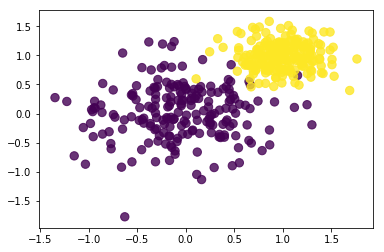

In [127]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

            x         y label
0    1.141230  1.027336     A
1    1.109312  1.937187     A
2    3.018866  0.496399     A
3    0.636775  1.350115     A
4    1.728329  1.713220     A
..        ...       ...   ...
995 -2.587622 -4.808746     B
996 -3.108645 -2.876316     B
997  0.292198 -3.587497     B
998  0.595149 -2.537647     B
999 -4.212976 -2.776607     B

[2000 rows x 3 columns]


Text(0.5, 1.0, 'Scatter plot of two categories')

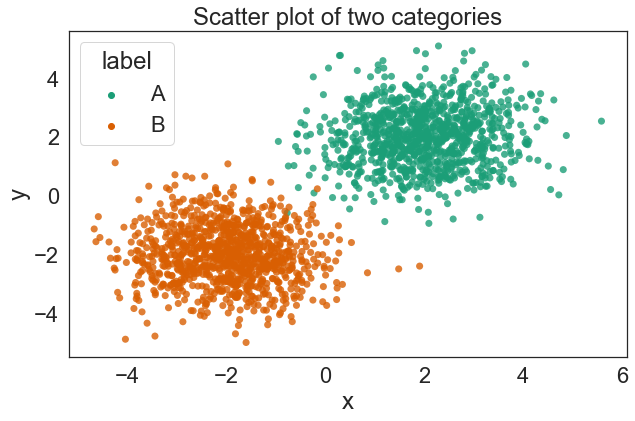

In [146]:
# Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 
# 2D gaussian with a given mean and std (clearly it is better to have different values means..)
N = 1000

mean =[[2,2],[-2,-2]]
cov1 = [[1,0.1],[0.1,1]]
cov2=[[1,0],[0,1]]
def generate_dataset(N,mean,cov1, cov2):
    import pandas as pd
    A = np.random.multivariate_normal(mean[0], cov1, N)
    B = np.random.multivariate_normal(mean[1], cov2, N)  
    df1 = pd.DataFrame(A, columns=['x','y'])
    df1['label'] = 'A'
    df2 = pd.DataFrame(B, columns=['x','y'])
    df2['label'] = 'B'
    df = pd.concat([df1, df2])
    return df

print (generate_dataset(N,mean,cov1, cov2))
# * Display the dataset in a scatter plot marking the two 
# categories with different marker colors.

fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
sns.scatterplot(x='x', y='y', hue='label', data=generate_dataset(N,mean,cov1, cov2), ax=ax, 
                s=50, linewidth=0, alpha=0.8)
ax.set_title('Scatter plot of two categories')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [148]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-12-01 15:56:04--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-12-01 15:56:05--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f2a85f16225a31d430dbb8b74.dl.dropboxusercontent.com/cd/0/inline/BbA7XHNuDVm4v6ujAQbpwb3jqu9553htnToeOWWSewvVAKlh-_MT3yrY1FUYRvrOaCvK5S1g-WDA3OpuG1I7QeTCT79-jX68gIjKpNP3W4c0SplJZjHlYKsnrEWMUA0ZBtfOztBQZJypW9u2AF1KC03q/file# [following]
--2021-12-01 15:56:05--  https://uc2f2a85f16225a31d430dbb8b74.dl.dropboxusercontent.com/cd/0/inline/BbA7XHNuDVm4v6ujAQbpwb3jqu9553htnToeOWWSewvVAKlh-_MT3yrY1FUYRvrOaCvK5S1g-WDA3OpuG1I7QeTCT79-jX68gIjKp

In [174]:
import pandas as pd
# Note that you should use the `np.load()` function to load the file as a numpy array, 
# call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle = True).item())
print(df.head())

# * Inspect the dataset, you'll find two variables (features)
# * Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
df = df[np.abs(df['residuals']) < 2]


# perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
from scipy.stats import linregress
r  = linregress(df['distances'], df['residuals'])

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7


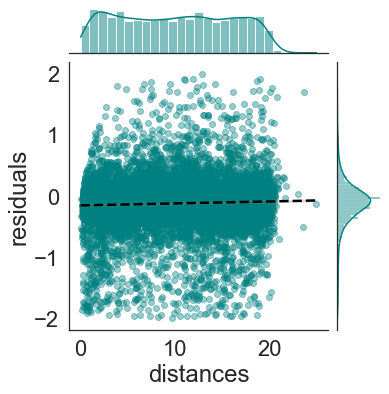

In [218]:
# plot a seaborn jointplot of  "residuals" versus "distances", 
# having seaborn performing a linear regression. The result of the regression should be displayed on the plot
# fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='white',font_scale=2)
ax=sns.jointplot(x='distances', y='residuals', data=df, ax=ax, kind='reg', color ='teal', 
            joint_kws = {'scatter_kws':dict(alpha=0.4), 
                        'line_kws':{'color':'black', 'linewidth':2.5, 'linestyle':'--'}})


In [279]:
# Fill 3 numpy arrays
#   * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
#   * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
#   * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
nbins = 20
x = np.linspace(0,20,nbins)
y = []
erry = []
for i in range(nbins):
    mean = np.mean(df[(df['distances']>i) & (df['distances']<i+1)]['residuals'])
    y.append(mean)
    stddev = np.std(df[(df['distances']>i) & (df['distances']<i+1)]['residuals'])
    erry.append(stddev)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

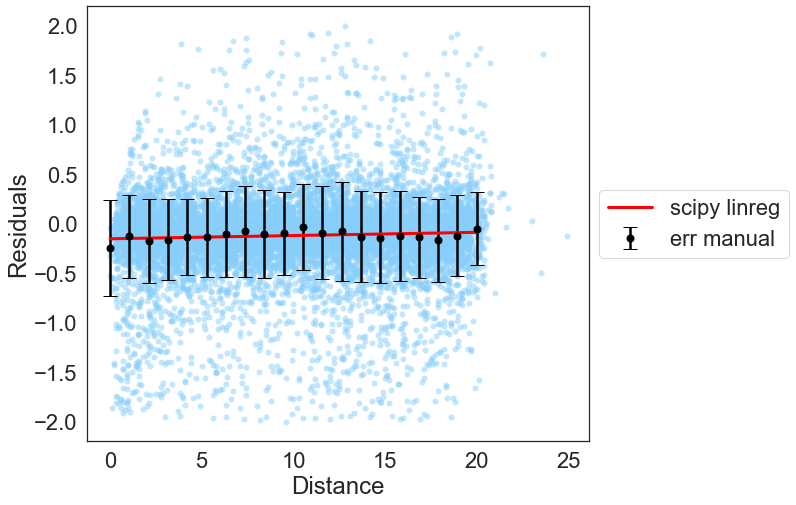

In [287]:
# Plot the profile plot on top of the scatter plot
fig,ax=plt.subplots(figsize=(9,8))
sns.set_theme(style='white',font_scale=2)
sns.scatterplot
ax.errorbar(x, y, yerr=erry, fmt='o', ecolor='black', elinewidth=2.5, color = 'black',
            capsize=7,label='err manual', marker='o', ms=7)
#scipy linreg
g=sns.lineplot(x, r.slope*x+r.intercept, color='red', linewidth=3, label='scipy linreg')

#scatter
sns.scatterplot(x='distances', y='residuals', data=df, ax=ax, linewidth=0, alpha=0.5, color='lightskyblue')

g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
ax.set_xlabel('Distance')
ax.set_ylabel('Residuals')
